In [278]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize,Bounds
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

### Dark theme pour matplotlib ###
from ing_theme_matplotlib import mpl_style

### Import du theme sombre pour matplotlib


In [279]:
mpl_style(dark=True)

In [280]:
def error_p(p,n=1000,Za=1.96) -> float:
    return np.sqrt(p*(1-p)/n)*Za

# Méthode pour le calcul des erreurs
Pour l'étude des variations il serait plus juste de définir la distance entre les deux courbes de répartition qui induirait un chance d'inversion des valeurs dans moins de 5% des cas.

0.05025

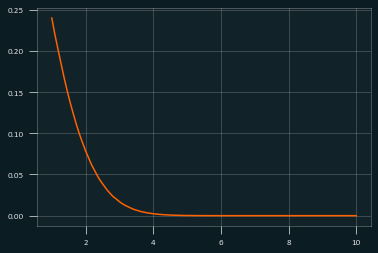

In [281]:
def sample_norm(mean1=0,std1=1,mean2=0,std2=1,size=1000000):
    a=np.random.normal(mean1, std1, size)
    b=np.random.normal(mean2, std2, size)
    return np.sum(a>b)/size

std=1
m=0
x = np.linspace(1, 10, 100)
y = [sample_norm(m,std,m+v*std,std,size=1000000) for v in x]
plt.plot(x,y)
sample_norm(m,std,m+std*2.328,std,size=1000000)

Une simulation monte carlo nous donne une valeur approximé à **2.328**. Il conviendrait d'utiliser cette valeur pour les études de variations. Das ce cas la marge d'erreur devrait être $$\frac{2.328}{2}\sigma=1.164\sigma$$

In [282]:
def draw_norm_err(m=0,std=1,err=0.05,xmin=0,xmax=7,draw_err=True,draw_extreme=0):

    Za_max=norm.ppf(1-err/2,loc=m,scale=std)
    Za_min=norm.ppf(err/2,loc=m,scale=std)
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x,m,std)
    if draw_err:
        xerr = np.linspace(Za_min, Za_max, 100)
        yerr = norm.pdf(xerr,m,std)
        plt.fill_between(xerr, yerr,alpha=0.2)
    if draw_extreme==1:
        xerr_red = np.linspace(Za_max, xmax, 20)
        yerr_red = norm.pdf(xerr_red,m,std)
        plt.fill_between(xerr_red, yerr_red,alpha=0.6,color='red')
    if draw_extreme==-1:
        xerr_red = np.linspace(Za_min, xmin, 20)
        yerr_red = norm.pdf(xerr_red,m,std)
        plt.fill_between(xerr_red, yerr_red,alpha=0.6,color='red')
    plt.plot(x,y)




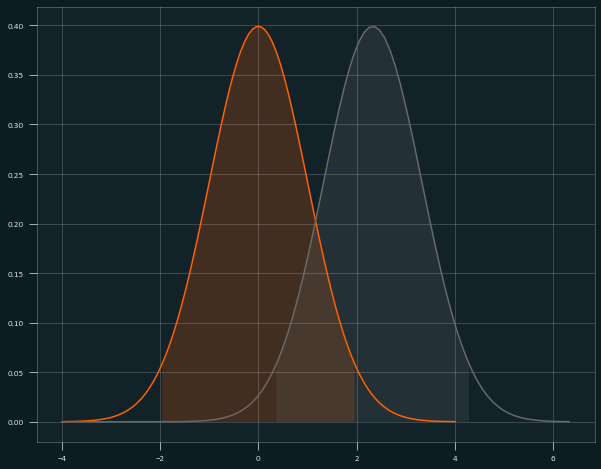

In [283]:
plt.figure(figsize=(10,8))
xmin,xmax=-4,4
std=1
m=0
err=0.05
draw_norm_err(m,std,err,xmin,xmax)
draw_norm_err(m+2.328,std,err,xmin,xmax+2.328)

# Corrections, modifications et précisions
Ce thread recense les modifications effectuées à l’analyse. Soit parce que je considère qu’elles sont intéressantes à détailler soit parce que je corrige une erreur ou j’explore un point de vue différent sur les données.

Il s’agira d’informations relativement techniques par rapport aux autres threads et qui ne seront donc pas à destination de tout le monde, mais qui me permettent de faire un suivi et aussi, si certains ont envie, de venir me corriger si je fais des erreurs.

Pour initier ce thread, je voudrais donc faire une correction sur mon analyse de pertinence des variations dans les rapports des instituts de sondages. Pour commencer, il faut comprendre que les marges d’erreurs sont calculées par rapport à une loi de probabilité appelée Loi normale ou Gaussienne

## Loi Normale

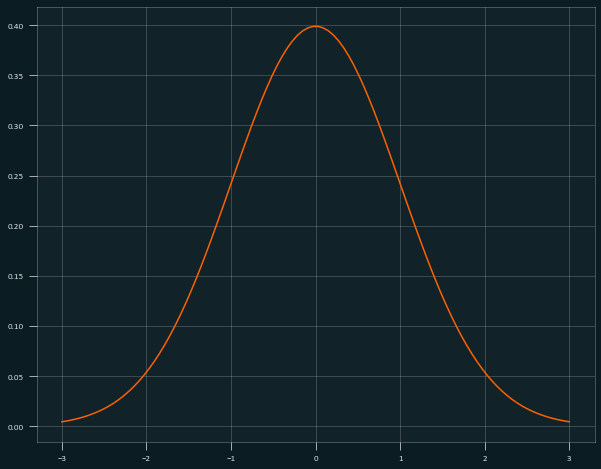

In [284]:
plt.figure(figsize=(10,8))
xmin,xmax=0,7
std=1
m=2
err=0.95
# draw_norm_err(m,std,err,xmin,xmax)
# draw_norm_err(m+2,std,err,xmin,xmax)
draw_norm_err(0,std,err,-3,3,False)
plt.savefig('plots/loi_normale.png',dpi=200)


Il s’agit d’une loi extrêmement connue en probabilité et qui revient régulièrement en probabilité.

Elle apparaît en statistique dans le domaine de l’échantillonnage à cause du Théorème Central Limite ( [https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_central_limite] ) qui stipule que le tirage aléatoire successifs de variables aléatoires converge vers une loi normale. Cette propriété est intéressante puisque dans le cas d’un échantillonnage, chaque échantillon est une variable aléatoire . Ainsi, avec suffisamment d’échantillon on peut se rapprocher d’une loi normale.

Par exemple : imaginons que nous tirions à pile ou face 100 fois, pile vaut 1 et face -1. Si nous faisons la somme de cent lancés on peut obtenir un nombre entre -100 et 100. Bien sûr certaines valeurs sont plus probables que d’autres. -100 et 100 étant très peu probables car il faut lancer respectivement 100 faces ou 100 piles.

En répétant cette expérience 1000 fois on peut alors représenter graphiquement la fréquence d’apparition de chaque nombre possibles

D:\Programmes\Python3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Programmes\Python3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


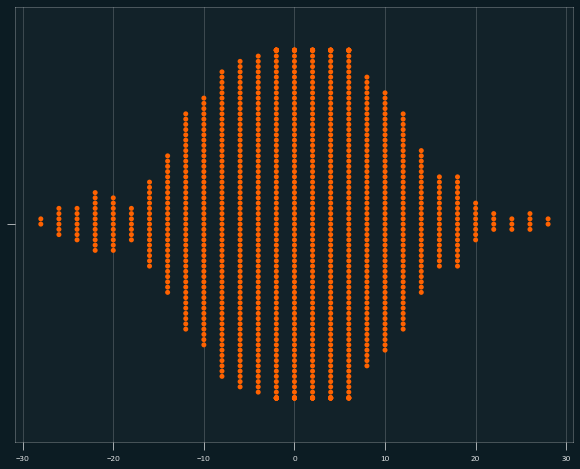

In [285]:
plt.figure(figsize=(10,8))
std=np.sqrt(2*np.pi)
x=np.random.choice([-1,1],(100,1000)).sum(axis=0)
# draw_norm_err(0,1,err,-3,3,False)
sns.swarmplot(x)
plt.savefig('plots/echantillonnage1.png',dpi=200)

On observe que certaines valeurs apparaissent plus souvent que d’autres, notamment autour de 0. Cela est normal puisque d’après le théorème central limite, cet échantillonnage est sensé tendre vers une loi normale.

Cela se voit d’ailleurs très bien dès que l’on trace une loi normale par dessus (la somme à été divisée par 10 pour être du même ordre de grandeur que le tracé de la loi normale, mais cela ne change rien au propos)

D:\Programmes\Python3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Programmes\Python3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


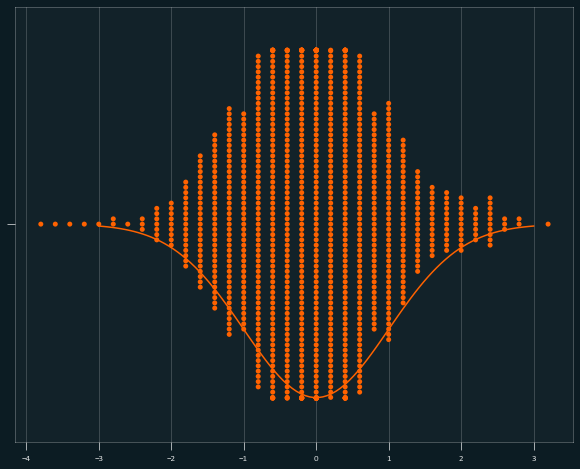

In [286]:
plt.figure(figsize=(10,8))
std=np.sqrt(2*np.pi)
x=np.random.choice([-1,1],(100,1000)).sum(axis=0)/10
draw_norm_err(0,1,err,-3,3,False)
sns.swarmplot(x)
plt.savefig('plots/echantillonnage2.png',dpi=200)

## Échantillonnage
Dans le cas d’un sondage, le problème est équivalent bien que pris à l’envers. On suppose qu’il existe une probabilité d’appartenir à un groupe ou un autre dans une population entière. Cette probabilité est en fait la fréquence d’apparition des éléments des différents groupes dans la population entière. Par exemple, il y a 54 % de femmes et 46 % d’hommes en France. En tirant aléatoirement 1000 francais.es au hasard et comptez le nombre de femmes, ce nombre sera proche de 540 (54 % de 1000). Il peut y avoir des variations mais qui sont contraint par le théorème central limite et la loi normale.

Si je réitère cette expérience 1000 fois, cela apparaît très clairement comme pour le lancé de pièces. Le nombre de femmes estimé est compris entre 490 et 600 avec une moyenne autour de 540.

D:\Programmes\Python3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


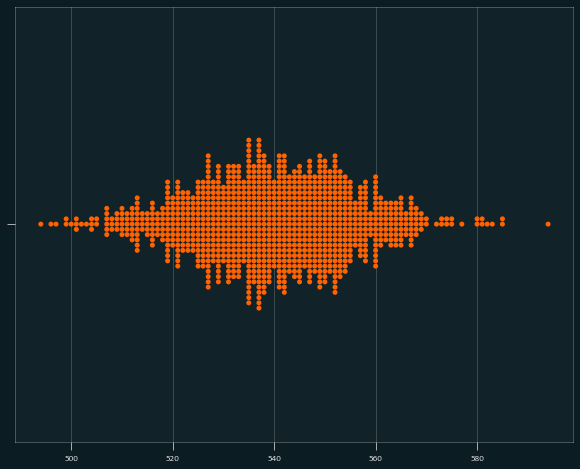

In [287]:
plt.figure(figsize=(10,8))
std=np.sqrt(2*np.pi)
x=np.random.choice([0,1],(1000,1000),p=[0.46,0.54]).sum(axis=0)
# draw_norm_err(0,1,err,-3,3,False)
sns.swarmplot(x)
plt.savefig('plots/femmes.png',dpi=200)


Cela veut donc dire que l’on peut estimer la fréquence d’appartenance à un groupe dans une population de plusieurs millions d’habitant avec un faible nombre d’individus tirés au hasard. Néanmoins, on remarque aussi que parfois le tirage aléatoire se « passe mal » avec des valeurs assez loin de la réalité : les cas aux extrêmes.

Heureusement, grâce au TCL (Théorème centrale limite) et à la loi normale on peut garantir un certain nombre de propriétés.

## Propriétés de la loi normale
Une des propriétés intéressantes est le rapport entre l’écart à la moyenne (à proportion des valeurs considérées) et la proportions des résultats possibles d’une succession de tirage aléatoire. Par exemple, la moyenne des écarts à la moyenne (aka l’écart-type) englobe toujours les 2/3 des résultats possibles. Dans le cas d’exemple du nombre de femmes, un écart de 12 par rapport à la moyenne représente 2/3 des échantillons.

D:\Programmes\Python3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


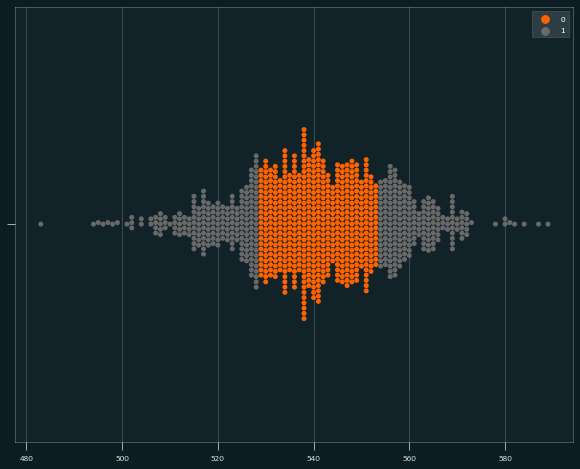

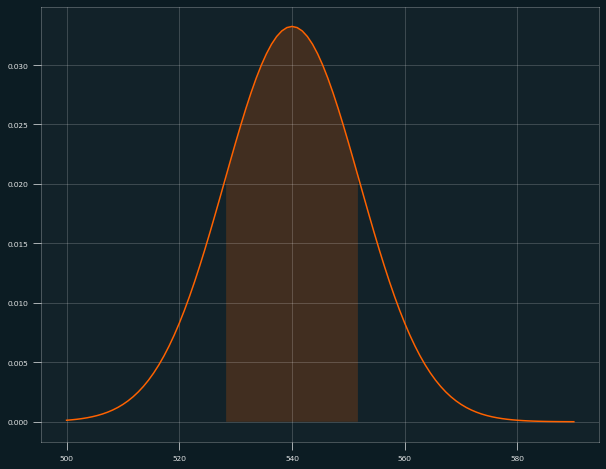

In [288]:
plt.figure(figsize=(10,8))
std=np.sqrt(2*np.pi)
x=np.random.choice([0,1],(1000,1000),p=[0.46,0.54]).sum(axis=0)
std_femmes=(np.abs(x-x.mean())).mean()
t=[0 if np.abs(v-x.mean())<std_femmes and v+x.mean()>std_femmes else 1 for v in x ]
sns.swarmplot(x, y=[""]*len(x),hue=t)
plt.savefig('plots/femmes_ecart.png',dpi=200)

plt.figure(figsize=(10,8))
xmin,xmax=500,590
std=12
m=540
err=0.33
draw_norm_err(m,std,err,xmin,xmax)
plt.savefig('plots/femmes_normale.png',dpi=200)


Par conséquence, il est possible de choisir un écart qui englobera toujours la même proportion de résultats. D’un point de vue de l’échantillonnage, cela veut dire que vous pouvez choisir un intervalle d’erreur (un écart à la moyenne) qui garantisse qu’un résultat soit dans cet intervalle avec une probabilité fixe.

## Estimation par un échantillon
Les instituts de sondages se reposent donc sur ces propriétés et théorèmes pour estimer les proportions de différents groupes dans une population. Ce faisant, il font leur échantillonnage de 1000 personnes et grâce au TCL, ils savent que leur résultat est quelque part sous la courbe de la loi normale associée : sans doute proche de la valeur réelle, mais potentiellement aussi aux extrêmes.

Hors, comme nous venons de le voir, il est possible de définir un écart à la moyenne (c’est-à-dire une marge d’erreur autour de la valeur réelle) qui garantisse que l’échantillonnage s’y trouve avec une certaine probabilité.

En général, les instituts de sondage prennent une valeur de confiance à 95 %, c’est-à-dire que les résultats obtenus ont 95 % de chance d’être dans l’intervalle associé.

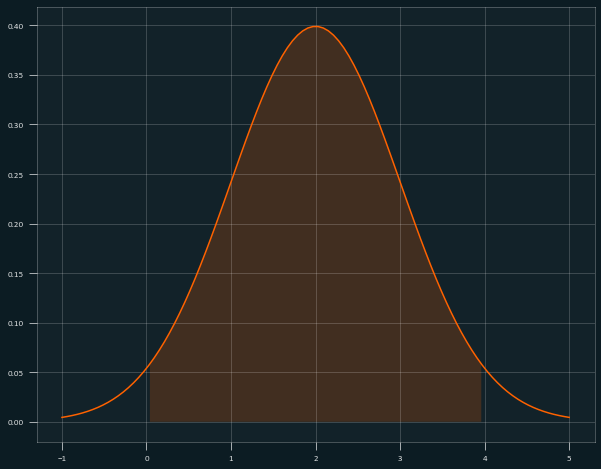

In [289]:
plt.figure(figsize=(10,8))
xmin,xmax=-1,5
std=1
m=2
err=0.05
draw_norm_err(m,std,err,xmin,xmax)
plt.savefig('plots/l_normale_95.png',dpi=200)

Si vous avez bien suivi, vous voyez que plus la valeur de confiance est élevée plus l’intervalle est grand (plus vous voulez que votre échantillon soit dans un intervalle d’erreur, plus vous devez agrandir cet intervalle).

## Une petite précision sur l’erreur d’un échantillon
Notez que jusqu’à présent, j’ai défini la valeur réelle comme étant la moyenne de notre loi normale, hors, en réalité, cette valeur n’est pas connue (c’est d’ailleurs pour cela que l’on fait un sondage). On va donc placer l’intervalle d’erreur autour de la valeur expérimentale puisque la probabilité d’erreur d’échantillonnage est dépendante de la distance à la valeur réelle. Hors cette distance est la même que l’on parte de la valeur réelle ou de la valeur estimée.

Exemple ci dessous la valeur réelle est 0 et la valeur estimée est deux. Que la courbe de distribution soit centrée sur la valeur observée ou la valeur réelle, la probabilité est la même.

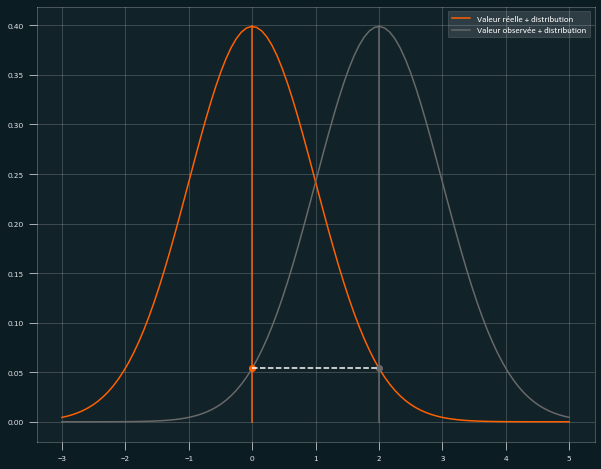

In [290]:
plt.figure(figsize=(10,8))
xmin,xmax=-3,5
std=1
m=0
draw_norm_err(m,std,err,xmin,xmax,False)
real_color=plt.gca().lines[-1].get_color()
draw_norm_err(m+2,std,err,xmin,xmax,False)
obs_color=plt.gca().lines[-1].get_color()
plt.legend(['Valeur réelle + distribution',"Valeur observée + distribution"])
plt.plot([0,0],[0,norm.pdf(0,m,std)],color=real_color,)
plt.plot([2,2],[0,norm.pdf(2,m+2,std)],color=obs_color,)
plt.plot([2],[norm.pdf(2,m,std)],'o',color=obs_color,markersize=6)
plt.plot([0],[norm.pdf(2,m,std)],'o',color=real_color,markersize=6)
plt.plot([0,2],[norm.pdf(2,m,std),norm.pdf(2,m,std)],linestyle='--',color='white')
plt.savefig('plots/reelle_estime.png',dpi=200)

## Et une petite précision sur l’écart-type
Pour la suite je définirai aussi les écarts en écart-type plutôt qu’en valeurs d’écart. L’écart-type étant la moyenne des écarts à la moyenne d’une distribution (en vrai c’est la racine carré de la moyenne des carrés des écarts à la moyenne).

La raison pour cela est qu’il est plus facile de l’exprimer ainsi car il est proportionné à la distribution et permet d’ignorer l’ordre des grandeurs des valeurs associées. On peut donc représenter l’écart incluant 66 % de la population avec le symbole sigma $\sigma$.

## Le problème des études sur les variations
Nous l’avons vu, il est facilement possible de définir un seuil de confiance (95%) qui sera associé à une marge d’erreur des valeurs obtenues. Seuil qui correspond aussi à 1,96 $\sigma$ (1,96 fois l’écart type).

Cela s’applique naturellement pour une seule valeur donnée, mais comment cela s’applique-t-il dans le cas d’une variation ?
Supposons que nous avons deux valeurs de popularité pour E. Macron à un mois d’intervalle : 40 % pour la première et 45 % pour la seconde. Le souci ici est que chacune des valeurs possèdent une marge d’erreur. 

Pour un sondage à 1000 personnes elle sera ici de l’ordre de +-3 pour UNE valeur. De fait, chacune de ces valeurs a sa propre marge d’erreur. La première a 95 % de chance d’être entre 37 % et 43 % et la seconde entre 42 % et 48 %.
Comme vous pouvez le remarquez les marges d’erreurs se chevauchent. Cela veut dire que malgré un écart de 5 % entre les deux résultats, il est malgré tout possible que les valeurs réelles soient positionnées de telle façon qu’il n’y a pas d’écart voire pire une variation mais dans l’autre sens.

# Caractériser une confiance sur les variations
## Interprétation initiale
Initialement, dans les analyses sur les instituts que j’ai effectué, je définissais donc la pertinence d’une variation seulement lorsque les marges d’erreurs ne se chevauchait pas.

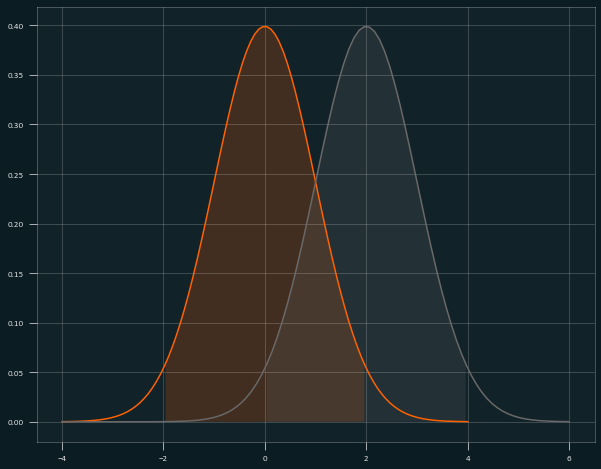

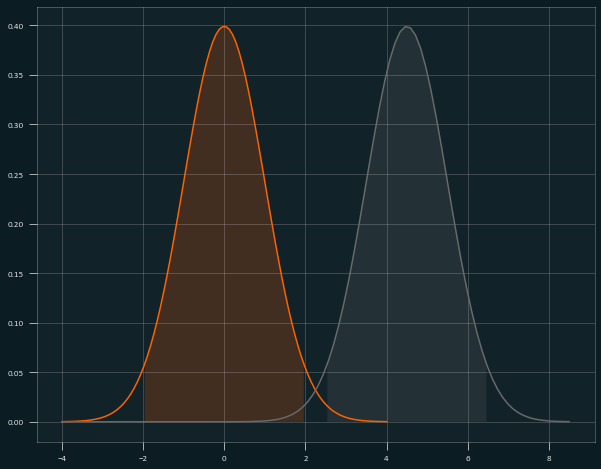

In [291]:
plt.figure(figsize=(10,8))
xmin,xmax=-4,4
std=1
m=0
err=0.05
draw_norm_err(m,std,err,xmin,xmax)
draw_norm_err(m+2,std,err,xmin,xmax+2)
plt.savefig('plots/chevauchement1.png',dpi=200)
plt.figure(figsize=(10,8))
xmin,xmax=-4,4
std=1
m=0
err=0.05
ecart=4.5
draw_norm_err(m,std,err,xmin,xmax)
draw_norm_err(m+ecart,std,err,xmin,xmax+ecart)
plt.savefig('plots/chevauchement2.png',dpi=200)

Bien qu’il ne s’agisse pas d’une analyse incorrecte, elle est probablement trop restrictive. Cela apparaît nettement lorsque l’on considère la probabilité que les valeurs réelles soient égalent ou inversées par rapport à ce qui est observé. Dans le cas où les deux marges d’erreurs seraient collées l’une à l’autre, un inversion ne peut se produire que si la valeur réelle de la première observation est du coté le plus proche de la seconde.

Dans le cas d’exemple, c’est donc considérer le cas ou la 1ere obs. est à + de 43 % et inversement pour la seconde, si la valeur réelle est à - de 42 %. Or la confiance étant à 95 %, les cas d’erreur n’arrivent que dans 5 % des cas pour les deux cotés inclus. Si l’on ne considère qu’un seul coté des marges d’erreurs, la probabilité d’être dans cette zone n’est que de 2,5 %

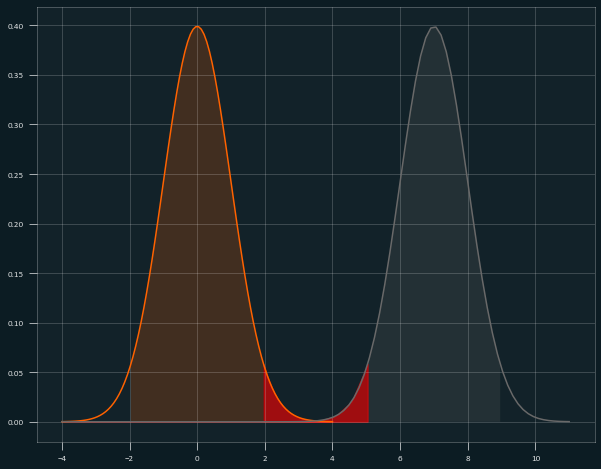

In [292]:
plt.figure(figsize=(10,8))
xmin,xmax=-4,4
std=1
m=0
err=0.05
ecart=4.5
draw_err=True
draw_norm_err(m,std,err,xmin,xmax,draw_err=True,draw_extreme=1)
m=m+7
xmax=xmax+7
draw_norm_err(m,std,err,xmin,xmax,draw_err=True,draw_extreme=-1)

plt.savefig('plots/zone_err2_5.png',dpi=200)

De fait, cela veut dire que ce cas a une chance de se produire avec une probabilité $\frac{1}{40} * \frac{1}{40} =\frac{1}{1600}$. La confiance pour que les deux valeurs soient dans les marges d’erreurs est ici de $1-\frac{1}{1600}$ soit 99,9375 %. On est donc extrêmement restrictif. Par ailleurs, cela caractérise très mal la confiance sur une variation, car même dans le cas de borne ou les deux marges d’erreurs se touchent mais ne se chevauchent pas, si une des valeurs est dans son intervalle d’erreur mais pas l’autre, une inversion est toujours possible.

Ex : la distrib en proba de deux valeurs observées (au milieu de chaque courbes) dont les marges d’erreurs se touchent mais ne se superpose pas. Les valeurs réelles correspondent aux points. Notez comme la valeur orange est dans son intervalle de confiance et pas la grise mais qu’il y a néanmoins une inversion de l’ordre orange et grise

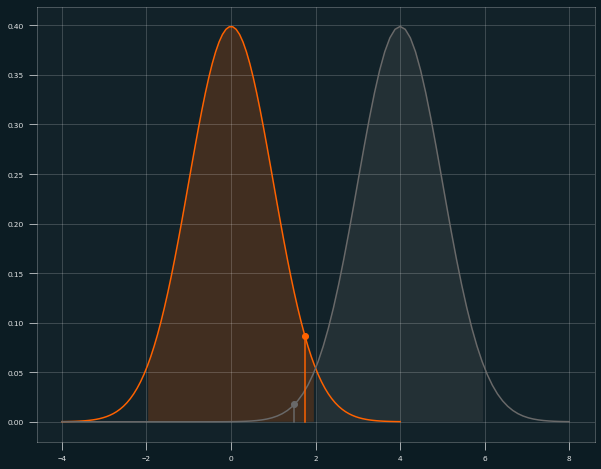

In [293]:
plt.figure(figsize=(10,8))
xmin,xmax=-4,4
std=1
m=0
err=0.05
ecart=4
draw_err=True
draw_norm_err(m,std,err,xmin,xmax,draw_err=True,draw_extreme=0)
fst_color=plt.gca().lines[-1].get_color()
draw_norm_err(m+ecart,std,err,xmin,xmax+ecart,draw_err=True,draw_extreme=0)
scd_color=plt.gca().lines[-1].get_color()
plt.plot([1.75,1.75],[0,norm.pdf(1.75,m,std)],color=fst_color,)
plt.plot([1.75],[norm.pdf(1.75,m,std)],'o',color=fst_color,markersize=6)
plt.plot([1.50,1.50],[0,norm.pdf(1.50,m+ecart,std)],color=scd_color,)
plt.plot([1.50],[norm.pdf(1.50,m+ecart,std)],'o',color=scd_color,markersize=6)
plt.savefig('plots/err_contact.png',dpi=200)

Mon objectif est donc de corriger mon analyse pour que la confiance sur une variation soit la même que la confiance sur les données de l’étude aka. 95 %.

– Confiance de variation à 95 %
L’objectif étant de définir une confiance à 95 %, c’est à dire, à partir de quelle distance entre mes deux valeurs observées je peux m’assurer qu’une inversion ou égalité des valeurs n’arrive que dans 5 % des cas par rapport à la variation observée. Notez néanmoins qu’elle ne caractérise pas l’importance de la variation mais seulement si elle existe.

J’avoue que mes compétences en maths sont clairement insuffisantes pour trouver cette valeur théoriquement donc je l’ai cherché expérimentalement. J’ai donc cherché cette valeur en considérant une distribution de probabilité entre les deux valeurs.

Si l’écart-type est le même entre les deux distributions, on peut estimer la probabilité d’inversion par échantillonnage. On va donc refaire nos échantillonnages en définissant deux lois normales espacées d’une distance relative à leur écart-type. Par exemple en tirant 1000 résultats en suivant la première loi et 1000 en suivant la seconde. On compare ensuite les valeurs des deux une à une en comptant le nombre de fois ou le résultats de la seconde est plus petite que la première. Il s’agit ainsi d’obtenir la fréquence d’inversion sur ces deux lois normales.

Le graphe ci dessous représente la probabilité d’inversion (ordonné) en fonction de la distance exprimée en nb d’écart-type (abscisse). La probabilité à 0,05 correspond à une distance de  $2\times 1.164\sigma$.

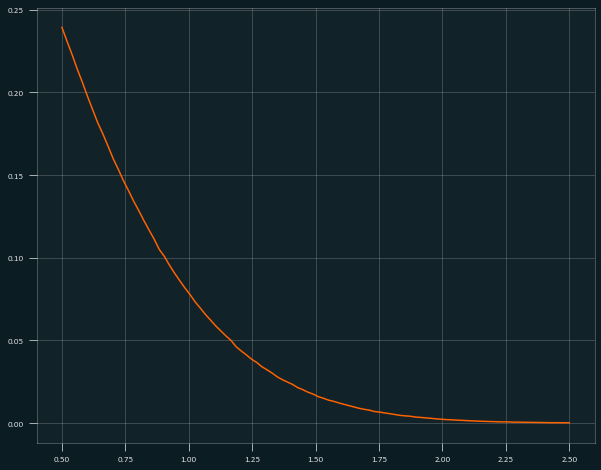

In [304]:
plt.figure(figsize=(10,8))
std=1
m=0
x = np.linspace(1, 5, 100)
y = np.array([sample_norm(m,std,m+v*std,std,size=1000000) for v in x])
plt.plot(x/2,y)

sample_norm(m,std,m+std*2.328,std,size=1000000)
plt.savefig('plots/estime_Za_centree_reduite.png',dpi=200)

Cela veut dire que l’espace entre les deux moyennes des courbes, aka les valeurs observées, doivent  à moins de $2\times 1.164\sigma$ l’une de l’autre. En terme de distribution de proba, cela va ressembler à qqch comme la figure ci dessous

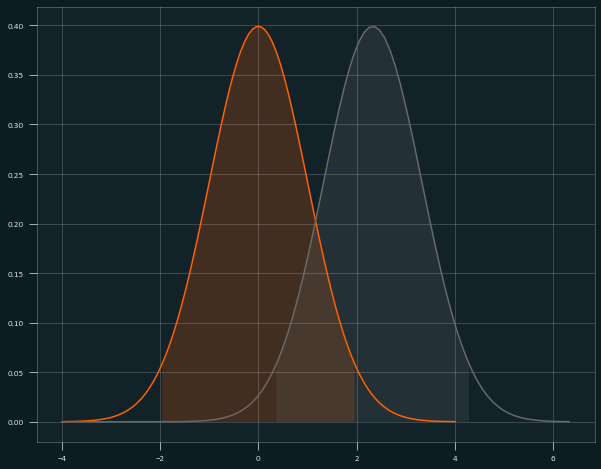

In [295]:
plt.figure(figsize=(10,8))
xmin,xmax=-4,4
std=1
m=0
err=0.05
draw_norm_err(m,std,err,xmin,xmax)
draw_norm_err(m+2.328,std,err,xmin,xmax+2.328)
plt.savefig('plots/var_distance_ideale.png',dpi=200)

## Correction en fonction de la taille
Nous avons supposé un écart type constant or il est en réalité dépendant de la probabilité observée $p$ et de la taille de l’échantillonnage utilisé par le sondage ( $\sigma=\frac{\sqrt{(p\times(1-p)}}{n})$ ). L’impact de la probabilité p qui  est peu significatif sur la probabilité au regard de n.

La première figure représente a probabilité d’inversion (ordonné) en fonction de la distance exprimée en nb d’écart-type lorsque $n_1 = k\times n_2$ et la seconde figure en fonction de différentes valeurs de $p$ et du rapport entre la taille d’échantillonnage $n_1$ et $n_2$ des deux valeurs observées.

In [296]:
def recherche_coeff(coeff,m,n,n2):
    std=np.sqrt(m*(1-m)/n)
    std2=np.sqrt(m*(1-m)/n2)
    for i in range(1000):
        m2=m+std*coeff+std2*coeff
        std2=np.sqrt(m2*(1-m2)/n2)
    return np.abs(sample_norm(m,std,m2,std2,size=1000000))

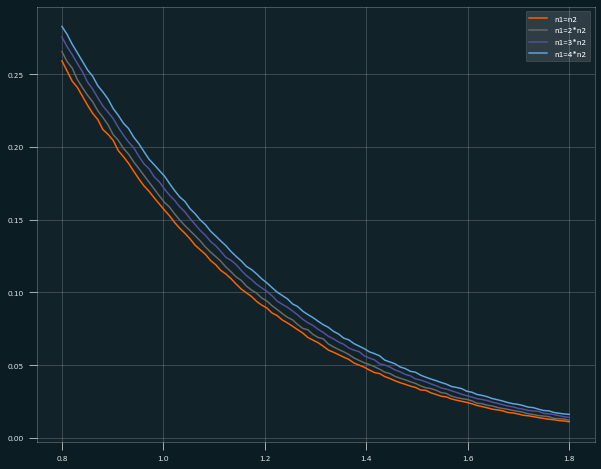

In [297]:
plt.figure(figsize=(10,8))
for n2 in [1000,2000,3000,4000]:
    x=np.linspace(0.8,1.8,100)
    y=[2*recherche_coeff(v,0.5,1000,n2) for v in x]
    sns.lineplot(x=x,y=y)
plt.legend(['n1=n2','n1=2*n2','n1=3*n2','n1=4*n2'])
plt.savefig('plots/estime_selon_n.png',dpi=200)

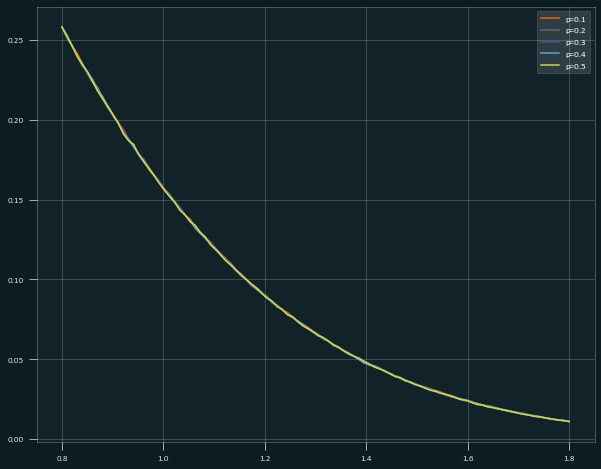

In [298]:
plt.figure(figsize=(10,8))
for p in [0.1,0.2,0.3,0.4,0.5]:
    x=np.linspace(0.8,1.8,100)
    y=[2*recherche_coeff(v,p,1000,1000) for v in x]
    sns.lineplot(x=x,y=y)
plt.legend(['p=0.1','p=0.2','p=0.3','p=0.4','p=0.5'])
plt.savefig('plots/estime_selon_p.png',dpi=200)

On voit que les variations de $p$ ont peu d'influence.